# Exercise 1 - Data storytelling

In [82]:
import pandas as pd
df = pd.read_csv("../../codealongs/03_matplotlib_annotations/data/1900-census-immigrant-pop-metro.csv")
df.head()

,City,State,Error,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other countries,Born at sea
0,Akron,Ohio,0,"7,127",4.0,NaN,NaN,1,190,9,...,187,1.0,2,200,258,NaN,226,8,NaN,6.0
1,Albany,New York,55,"17,718",3.0,39.0,4,13,106,13,...,395,1.0,1,65,64,21,80,4,3.0,15.0
2,Allegheny,Pennsylvania,0,"30,216",4.0,5.0,2,8,"3,929",10,...,"1,183",2.0,2,186,488,4,798,4,3.0,25.0
3,Allentown,Pennsylvania,3,"2,991",NaN,1.0,NaN,2,337,2,...,66,1.0,NaN,5,26,3,40,2,3.0,1.0
4,Altoona,Pennsylvania,65,"3,301",2.0,7.0,NaN,NaN,57,2,...,98,2.0,1,32,55,25,23,1,8.0,4.0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 50 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   City                                         161 non-null    object 
 1   State                                        161 non-null    object 
 2   Error                                        161 non-null    int64  
 3   Total foreign born                           161 non-null    object 
 4   Africa                                       120 non-null    float64
 5   Asia (except China, Japan, and India)        133 non-null    float64
 6   Atlantic Islands                             99 non-null     object 
 7   Australia                                    136 non-null    object 
 8   Austria                                      161 non-null    object 
 9   Belgium                                      145 non-null    object 
 10  Bo

In [84]:
df = df.fillna("0")
df.head()

,City,State,Error,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other countries,Born at sea
0,Akron,Ohio,0,"7,127",4.0,0,0,1,190,9,...,187,1.0,2,200,258,0,226,8,0,6.0
1,Albany,New York,55,"17,718",3.0,39.0,4,13,106,13,...,395,1.0,1,65,64,21,80,4,3.0,15.0
2,Allegheny,Pennsylvania,0,"30,216",4.0,5.0,2,8,"3,929",10,...,"1,183",2.0,2,186,488,4,798,4,3.0,25.0
3,Allentown,Pennsylvania,3,"2,991",0,1.0,0,2,337,2,...,66,1.0,0,5,26,3,40,2,3.0,1.0
4,Altoona,Pennsylvania,65,"3,301",2.0,7.0,0,0,57,2,...,98,2.0,1,32,55,25,23,1,8.0,4.0


In [85]:
nordic_countries = ["Sweden", "Finland", "Denmark", "Norway"]
for country in nordic_countries:
    df[country] = df[country].str.replace(",", "").astype(int)
df["Sweden"]

0       200
1        65
2       186
3         5
4        32
       ... 
156      45
157    7542
158     289
159      10
160     343
Name: Sweden, Length: 161, dtype: int64

In [103]:
import duckdb
df_nordic = duckdb.query("""--sql
            WITH Nordic AS (SELECT 
                state,
                SUM("Sweden") as Swedes,
                SUM("Norway") as Norwegians,
                SUM("Denmark") as Danes,
                SUM("Finland") as Finnish,
            FROM df 
            GROUP BY state)
            SELECT *, n.Swedes + n.Norwegians + n.Danes + n.Finnish AS Nordic_tot
            FROM Nordic n
            ORDER BY Nordic_tot DESC
    """).df().set_index("State")
df_nordic.head()

,Swedes,Norwegians,Danes,Finnish,Nordic_tot
State,,,,,
Illinois,57158.0,22300.0,10374.0,447.0,90279.0
Minnesota,34984.0,17087.0,2975.0,1101.0,56147.0
New York,29961.0,11752.0,6186.0,3764.0,51663.0
Massachusetts,21971.0,2366.0,1451.0,3154.0,28942.0
Wisconsin,4034.0,6485.0,4024.0,405.0,14948.0


In [ ]:
df_nordic = df_nordic.drop(columns="Nordic_tot")

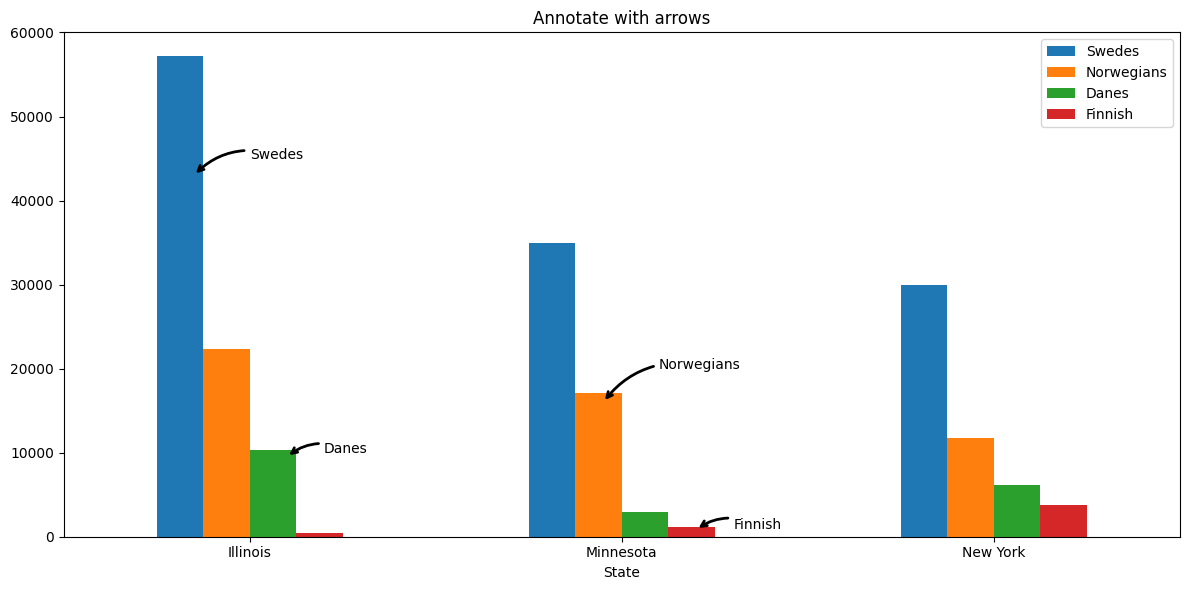

In [ ]:
ax = df_nordic.iloc[:3].plot(kind="bar", title= "Annotate with arrows", figsize=(12,6))
ax.tick_params(axis='x', rotation=0)
arrowprops = dict(arrowstyle = "->", linewidth = 2, connectionstyle = "arc3, rad=.3")
ax.annotate(text= "Swedes", xy=(-0.15,43000), xytext=(0,45000), arrowprops=arrowprops)
ax.annotate(text= "Norwegians", xy= (0.95,16000), xytext=(1.1,20000), arrowprops=arrowprops)
ax.annotate(text= "Danes", xy= (0.1, 9500), xytext=(0.2,10000), arrowprops=arrowprops)
ax.annotate(text= "Finnish", xy=(1.2, 850), xytext=(1.3,900), arrowprops=arrowprops)
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("../figures/ex1_0_start.png")

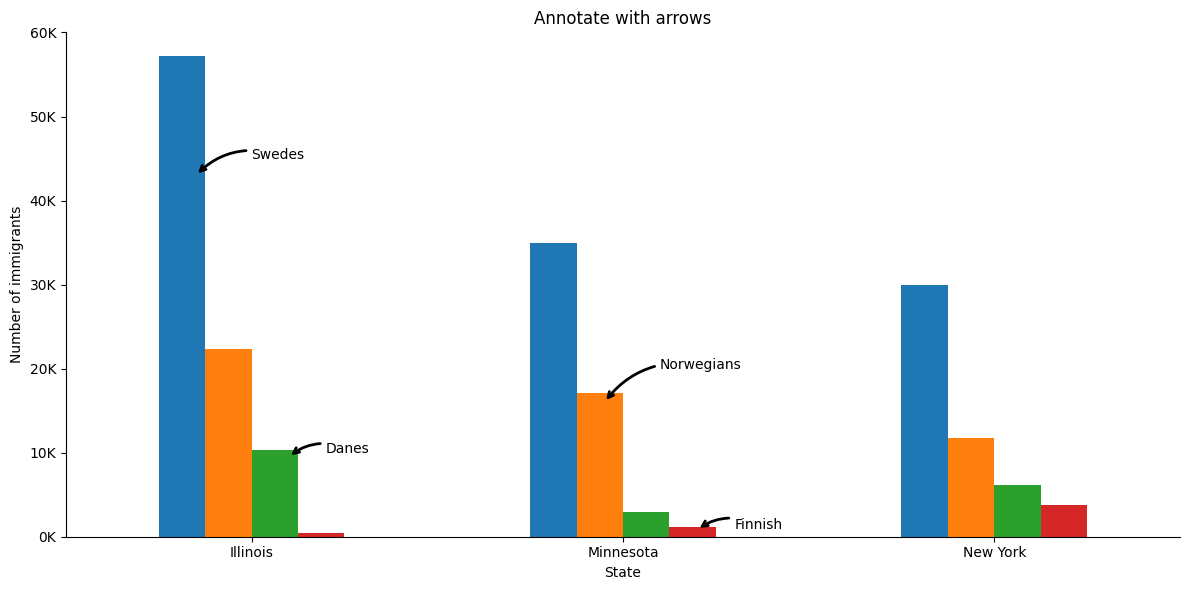

In [174]:
#a) Remove clutter from this visualization such as top spine and right spine. 
# Also change the unit to thousands with a prefix K.
from matplotlib.ticker import FuncFormatter
ax = df_nordic.iloc[:3].plot(kind="bar", title= "Annotate with arrows", figsize=(12,6))
ax.tick_params(axis='x', rotation=0)
arrowprops = dict(arrowstyle = "->", linewidth = 2, connectionstyle = "arc3, rad=.3")
ax.annotate(text= "Swedes", xy=(-0.15,43000), xytext=(0,45000), arrowprops=arrowprops)
ax.annotate(text= "Norwegians", xy= (0.95,16000), xytext=(1.1,20000), arrowprops=arrowprops)
ax.annotate(text= "Danes", xy= (0.1, 9500), xytext=(0.2,10000), arrowprops=arrowprops)
ax.annotate(text= "Finnish", xy=(1.2, 850), xytext=(1.3,900), arrowprops=arrowprops)

ax.spines[["top", "right"]].set_visible(False)
ax.set_ylabel("Number of immigrants")
def formatter(val,pos):
     return f'{int(val/1000)}K'
#formatter = FuncFormatter(lambda val, pos: f"{int(val/1000)}K")
ax.yaxis.set_major_formatter(formatter)
ax.legend().remove()

fig = ax.get_figure()
fig.tight_layout()
#fig.savefig("../figures/ex1_0_final.png")

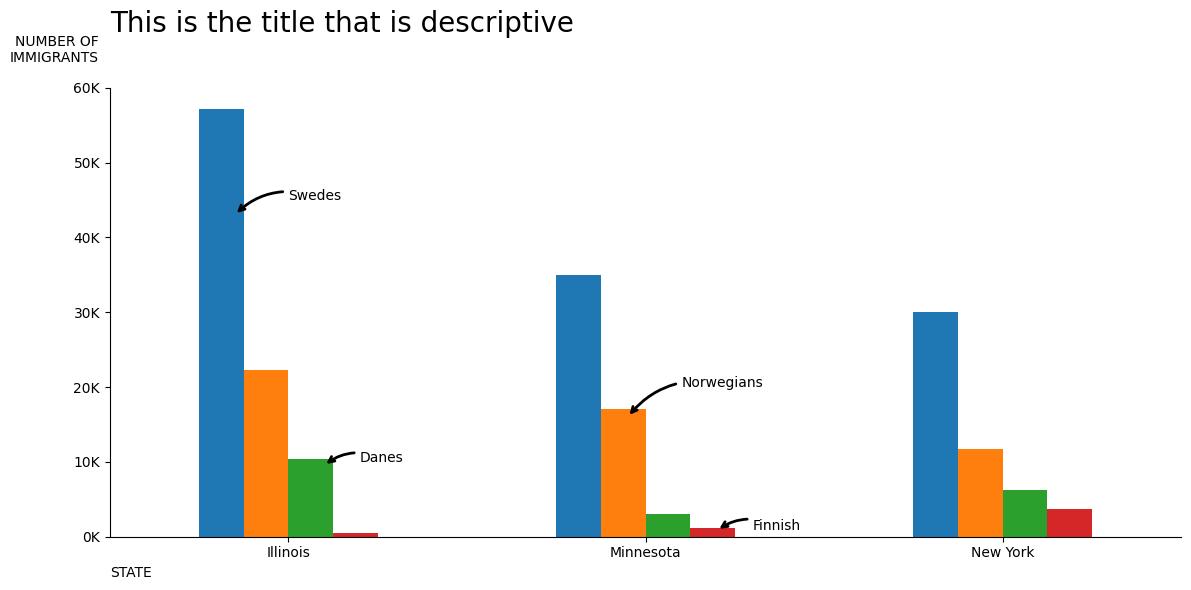

In [175]:
#b) Left align the xlabel, top align the ylabel and left align the title

ax = df_nordic.iloc[:3].plot(kind="bar", figsize=(12,6))
ax.tick_params(axis='x', rotation=0)
arrowprops = dict(arrowstyle = "->", linewidth = 2, connectionstyle = "arc3, rad=.3")
ax.annotate(text= "Swedes", xy=(-0.15,43000), xytext=(0,45000), arrowprops=arrowprops)
ax.annotate(text= "Norwegians", xy= (0.95,16000), xytext=(1.1,20000), arrowprops=arrowprops)
ax.annotate(text= "Danes", xy= (0.1, 9500), xytext=(0.2,10000), arrowprops=arrowprops)
ax.annotate(text= "Finnish", xy=(1.2, 850), xytext=(1.3,900), arrowprops=arrowprops)

ax.spines[["top", "right"]].set_visible(False)
ax.legend().remove()


def formatter(val,pos):
     return f'{int(val/1000)}K'
#formatter = FuncFormatter(lambda val, pos: f"{int(val/1000)}K")
ax.yaxis.set_major_formatter(formatter)

ax.set_title("This is the title that is descriptive", loc="left", pad=40, fontsize=20)
ax.set_xlabel("STATE", loc="left")
ax.set_ylabel("NUMBER OF\nIMMIGRANTS", loc= "top", rotation=0)
ax.yaxis.set_label_coords(-0.01,1.05)

#ax.set_ylabel("CAR BRAND", color = GRAY_2, rotation=0, fontweight="bold")

fig = ax.get_figure()
fig.tight_layout()
#fig.savefig("../figures/ex1_0_final.png")

In [179]:
colors = ["#CCCCCC"]*len(df_nordic.iloc[:3])
#colors[2] = BLUE_1
colors

['#CCCCCC', '#CCCCCC', '#CCCCCC']

In [ ]:
ax.containers[0][1].get_height(), ax.containers[0][1].get_x()

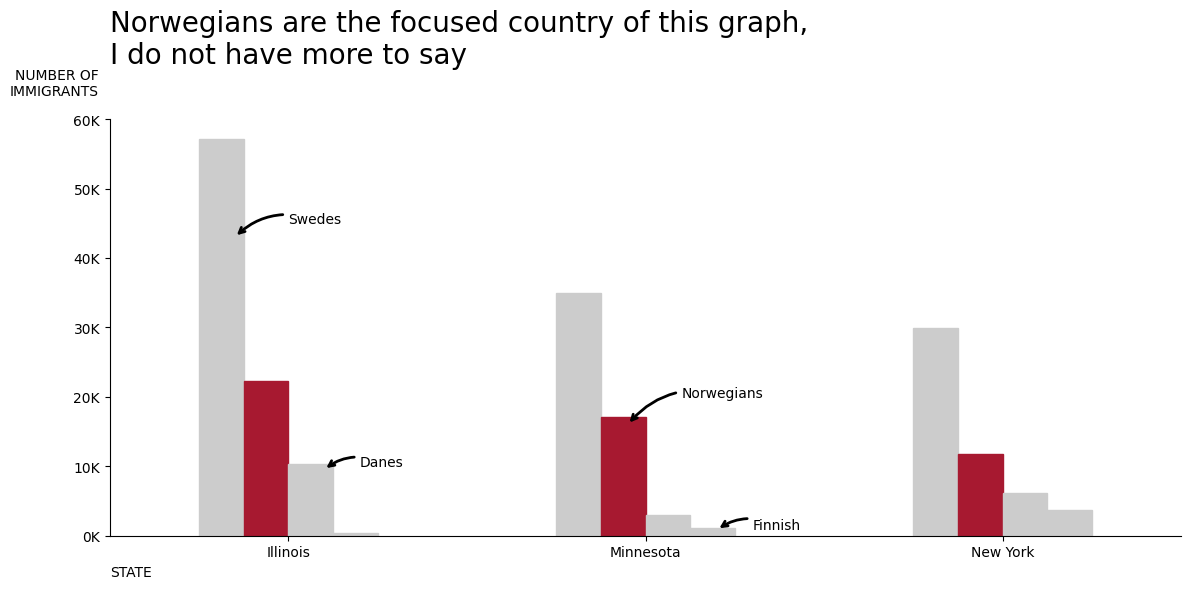

In [195]:
#c) Use contrast to focus the attention to what you want the audience to see
## VERY POOR HARD CODED IMPLEMENTATION

ax = df_nordic.iloc[:3].plot(kind="bar", figsize=(12,6))
ax.tick_params(axis='x', rotation=0)
arrowprops = dict(arrowstyle = "->", linewidth = 2, connectionstyle = "arc3, rad=.3")
ax.annotate(text= "Swedes", xy=(-0.15,43000), xytext=(0,45000), arrowprops=arrowprops)
ax.annotate(text= "Norwegians", xy= (0.95,16000), xytext=(1.1,20000), arrowprops=arrowprops)
ax.annotate(text= "Danes", xy= (0.1, 9500), xytext=(0.2,10000), arrowprops=arrowprops)
ax.annotate(text= "Finnish", xy=(1.2, 850), xytext=(1.3,900), arrowprops=arrowprops)

ax.spines[["top", "right"]].set_visible(False)
ax.legend().remove()

ax.containers[0][0].set_color("#CCCCCC")
ax.containers[0][1].set_color("#CCCCCC")
ax.containers[0][2].set_color("#CCCCCC")
ax.containers[2][0].set_color("#CCCCCC")
ax.containers[2][1].set_color("#CCCCCC")
ax.containers[2][2].set_color("#CCCCCC")
ax.containers[3][0].set_color("#CCCCCC")
ax.containers[3][1].set_color("#CCCCCC")
ax.containers[3][2].set_color("#CCCCCC")
ax.containers[1][0].set_color("#A71930")
ax.containers[1][1].set_color("#A71930")
ax.containers[1][2].set_color("#A71930")

def formatter(val,pos):
     return f'{int(val/1000)}K'
#formatter = FuncFormatter(lambda val, pos: f"{int(val/1000)}K")
ax.yaxis.set_major_formatter(formatter)

ax.set_title("Norwegians are the focused country of this graph,\nI do not have more to say", loc="left", pad=40, fontsize=20)
ax.set_xlabel("STATE", loc="left")
ax.set_ylabel("NUMBER OF\nIMMIGRANTS", loc= "top", rotation=0)
ax.yaxis.set_label_coords(-0.01,1.05)

#ax.set_ylabel("CAR BRAND", color = GRAY_2, rotation=0, fontweight="bold")

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("../figures/ex1_0_final.png")

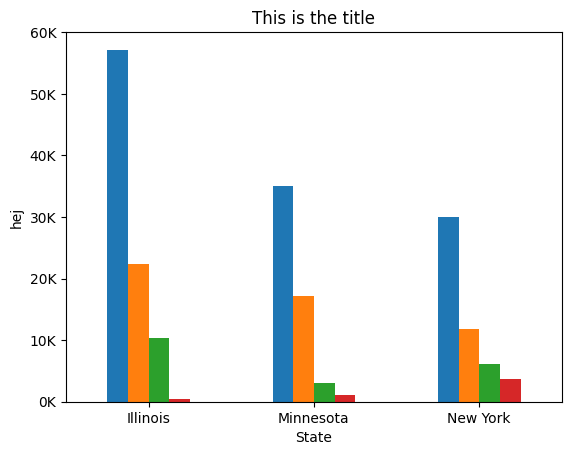

In [ ]:
# make a generailised plotting function
def plotter(df, kind, title, ylabel=None, thousand_formatter=False, legend=True):
    ax = df.plot(kind=kind, title=title)
    ax.tick_params(axis='x', rotation=0)
    if thousand_formatter == True:
        formatter = FuncFormatter(lambda val, pos: f"{int(val/1000)}K")
        ax.yaxis.set_major_formatter(formatter)
    if ylabel != None:
        ax.set_ylabel(f"{ylabel}")
    if legend == False:
        ax.legend().remove()
    fig = ax.get_figure()
    return fig, ax

fig, ax = plotter(df_nordic.iloc[:3], "bar", title="This is the title", thousand_formatter=True, ylabel="hej", legend=False)
#fig.savefig("../figures/test_av_func.png")